<div style="text-align: center;">
  <h3>Task created using grok.ai</h3>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Section 1: General Practices

In [2]:
#Load the 'npl_ball_by_ball.csv' dataset into a pandas DataFrame and display the first five rows.
df=pd.read_csv(r"file/npl_2024_ball_by_ball.csv")
df.head()

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_batter,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,4,0,4,False,NaN,NaN,2024,11,30,Pace
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,0,1,1,False,NaN,NaN,2024,11,30,Pace
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace


In [3]:
#Check for any missing values in the dataset and report the count per column.
df.isnull().sum()

match_id               0
date                   0
batting_team           0
bowling_team           0
inning                 0
over                   0
ball                   0
batter                 0
batting_side           0
non_striker            0
bowler                 0
bowling_type           0
runs_batter            0
runs_extras            0
runs_total             0
is_wicket              0
wicket_kind         7043
player_out          7043
year                   0
month                  0
day                    0
bowling_category     208
dtype: int64

In [4]:
#Convert the 'date' column to datetime format and extract year and month into separate columns
df["date"]=pd.to_datetime(df["date"])

df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df.head()

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_batter,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,4,0,4,False,NaN,NaN,2024,11,30,Pace
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,0,1,1,False,NaN,NaN,2024,11,30,Pace
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace


In [5]:
#add inning column in dataset

innings_list = []
current_inning = 0
current_match = None

for idx, row in df.iterrows():                        
    if row['match_id'] != current_match:
        current_match = row['match_id']
        current_inning = 0

    if row['over'] == 0 and row['ball'] == 0:
        current_inning += 1

    innings_list.append(current_inning)

df['inning'] = innings_list
#extract file
 #df.to_csv(r"file/npl_ball_by_ball.csv")


```python
# Create two separate columns: batting_team and bowling_team

# Note : team name are changed to short form now.
batters = df[(df["over"] == 0) & (df["ball"] == 0)]["batter"].unique()   # extracted the opener of every inning
bowler = df[(df["over"] == 0) & (df["ball"] == 0)]["bowler"].unique()

batter_map = {
    'Lokesh Bam': 'Biratnagar Kings',
    'AK Sah': 'Janakpur Bolts',
    'SS Eskinazi': 'Kathmandu Gurkhas',
    'Hassan Eisakhil': 'Chitwan Rhinos',
    'D Khanal': 'Karnali Yaks',
    'A Shrestha': 'Kathmandu Gurkhas',
    'K Bhurtel': 'Pokhara Avengers',
    'Shankar Rana': 'Kathmandu Gurkhas',
    'A Ghiraiya': 'Lumbini Lions',
    'D Kharel': 'Pokhara Avengers',
    'SA Zaib': 'Sudurpaschim Royals',
    'M Levitt': 'Kathmandu Gurkhas',
    'LM Benkenstein': 'Chitwan Rhinos',
    'S Dhawan': 'Karnali Yaks',
    'A Saud': 'Lumbini Lions',
    'S Karki': 'Chitwan Rhinos',
    'RA Reifer': 'Pokhara Avengers',
    'MJ Guptill': 'Biratnagar Kings',
    'BKEL Milantha': 'Janakpur Bolts',
    'Babar Hayat': 'Karnali Yaks',
    'JA Kolsawala': 'Karnali Yaks',
    'S Kansakar': 'Janakpur Bolts'
}

bowler_map = {
    'K Mahato': 'Janakpur Bolts',
    'CB Sole': 'Biratnagar Kings',
    'R Dhakal': 'Chitwan Rhinos',
    'Karan KC': 'Kathmandu Gurkhas',
    'NK Yadav': 'Karnali Yaks',
    'SC Kuggeleijn': 'Sudurpaschim Royals',
    'Bipin Khatri': 'Pokhara Avengers',
    'Sohail Tanvir': 'Chitwan Rhinos',
    'Sompal Kami': 'Karnali Yaks',
    'Pratis GC': 'Biratnagar Kings',
    'RR Simmonds': 'Lumbini Lions',
    'Aakash Chand': 'Pokhara Avengers',
    'Harmeet Singh': 'Sudurpaschim Royals',
    'Shahab Alam': 'Kathmandu Gurkhas',
    'A Kharel': 'Biratnagar Kings',
    'S Lamichhane': 'Biratnagar Kings',
    'RA Reifer': 'Pokhara Avengers',
    'S Dhakal': 'Pokhara Avengers',
    'LN Rajbanshi': 'Janakpur Bolts',
    'H Thaker': 'Janakpur Bolts'
}

batter_map_lower = {k.lower(): v for k, v in batter_map.items()}
bowler_map_lower = {k.lower(): v for k, v in bowler_map.items()}

batting_teams = []
bowling_teams = []

current_match = None
current_inning = 0
current_batting_team = None
current_bowling_team = None

for idx, row in df.iterrows():
    if row['match_id'] != current_match:
        current_match = row['match_id']
        current_inning = 0
        current_batting_team = None
        current_bowling_team = None

    if row['over'] == 0 and row['ball'] == 0:
        current_inning += 1
        batter_lower = str(row['batter']).lower()
        bowler_lower = str(row['bowler']).lower()

        current_batting_team = batter_map_lower.get(batter_lower, 'Unknown')
        current_bowling_team = bowler_map_lower.get(bowler_lower, 'Unknown')

    batting_teams.append(current_batting_team)
    bowling_teams.append(current_bowling_team)

df['batting_team'] = batting_teams
df['bowling_team'] = bowling_teams

df.to_csv("npl_ball_by_ball_modified.csv")
```


In [6]:
#Create a pivot table showing the total runs scored by each 'batting_team'.
df.pivot_table(index='batting_team', values='runs_total', aggfunc='sum').reset_index()


,batting_team,runs_total
0,BRK,980
1,CHR,1167
2,JKB,1298
3,KNY,1183
4,KTG,1006
5,LBL,1013
6,PKA,934
7,SPR,1191


In [7]:
#Create a crosstab to show the frequency of each 'wicket_kind' per 'bowling_type'
pd.crosstab(df['bowling_type'], df['wicket_kind'])

wicket_kind,bowled,caught,caught and bowled,lbw,retired out,run out,stumped
bowling_type,,,,,,,
left arm fast medium,3,5,1,0,0,0,0
left arm medium,8,9,1,4,0,5,0
left arm medium fast,4,14,1,3,0,4,0
legbreak googly,2,4,0,0,0,2,0
right arm fast,1,9,0,2,0,2,0
right arm fast medium,8,23,1,7,0,6,0
right arm legbreak,4,16,0,6,0,0,0
right arm medium,11,25,2,8,0,10,1
right arm medium fast,9,17,0,7,1,4,0


In [8]:
#Group the data by 'bowler' and compute total runs conceded.
bowler_runs_conceded = df.groupby('bowler')[['runs_total']].sum().reset_index()
bowler_runs_conceded.sort_values(by='runs_total', ascending=False).head(20)


,bowler,runs_total
38,k mahato,275
56,r dhakal,246
77,sompal kami,243
34,jds neesham,234
42,ln rajbanshi,222
68,s lamichhane,214
20,cb sole,212
73,sc kuggeleijn,210
48,mohammad mohsin,208
30,h thaker,198


In [9]:
#Filter out all dot balls and count them by each bowler.
dot_balls=df[df["runs_total"]==0]
dot_balls["bowler"].value_counts()

bowler
ln rajbanshi       135
mohammad mohsin    102
zeeshan maqsood     98
sohail tanvir       95
sc kuggeleijn       95
                  ... 
d kharel             3
nar sarki            2
b khatri             2
d khanal             2
rohan mustafa        1
Name: count, Length: 84, dtype: int64

In [10]:
#Sort the dataset by 'match_id', then by 'inning', and then by 'over'.
df.sort_values(["match_id","inning","over"])

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_batter,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,4,0,4,False,NaN,NaN,2024,11,30,Pace
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,0,1,1,False,NaN,NaN,2024,11,30,Pace
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,Pace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,1462670,2024-12-21,JKB,SPR,2,18,3,a tripathi,r,h thaker,...,0,0,0,True,run out,a tripathi,2024,12,21,Spin
7494,1462670,2024-12-21,JKB,SPR,2,18,4,mayan yadav,r,h thaker,...,0,0,0,False,NaN,NaN,2024,12,21,Spin
7495,1462670,2024-12-21,JKB,SPR,2,18,5,mayan yadav,r,h thaker,...,0,0,0,False,NaN,NaN,2024,12,21,Spin
7496,1462670,2024-12-21,JKB,SPR,2,19,0,h thaker,r,mayan yadav,...,1,0,1,False,NaN,NaN,2024,12,21,Spin


In [11]:
#Use multi-level indexing with 'match_id', 'inning', and 'over' and display a sample group.

df_multi_indexed = df.set_index(['match_id', 'inning', 'over'])
df_multi_indexed.loc[(1462670, 1, 2)]



date batting_team bowling_team  ball      batter  \
match_id inning over                                                          
1462670  1      2    2024-12-21          SPR          JKB     0  b bhandari   
                2    2024-12-21          SPR          JKB     1  b bhandari   
                2    2024-12-21          SPR          JKB     2     sa zaib   
                2    2024-12-21          SPR          JKB     3     sa zaib   
                2    2024-12-21          SPR          JKB     4     sa zaib   
                2    2024-12-21          SPR          JKB     5  b bhandari   

                     batting_side non_striker        bowler  \
match_id inning over                                          
1462670  1      2               r     sa zaib  ln rajbanshi   
                2               r     sa zaib  ln rajbanshi   
                2               r  b bhandari  ln rajbanshi   
                2               r  b bhandari  ln rajbanshi   
                2               r  b bhandari  ln rajbanshi   
                2               r     sa zaib  ln rajbanshi   

                                bowling_type  runs_batter  runs_extras  \
match_id inning over                                                     
1462670  1      2     slow left arm orthodox            0            0   
                2     slow left arm orthodox            1            0   
                2     slow left arm orthodox            2            0   
                2     slow left arm orthodox            0            0   
                2     slow left arm orthodox            1            0   
                2     slow left arm orthodox            0            0   

                      runs_total  is_wicket wicket_kind player_out  year  \
match_id inning over                                                       
1462670  1      2              0      False         NaN        NaN  2024   
                2              1      False         NaN        NaN  2024   
                2              2      False         NaN        NaN  2024   
                2              0      False         NaN        NaN  2024   
                2              1      False         NaN        NaN  2024   
                2              0      False         NaN        NaN  2024   

                      month  day bowling_category  
match_id inning over                               
1462670  1      2        12   21             Spin  
                2        12   21             Spin  
                2        12   21             Spin  
                2        12   21             Spin  
                2        12   21             Spin  
                2        12   21             Spin

In [12]:
#Fill missing 'wicket_kind' entries with 'None'.
df['wicket_kind'] = df['wicket_kind'].fillna('None')


In [13]:
#12. Merge the DataFrame with itself to get next delivery info for each row.
df_next = df.copy()
df_next['ball'] = df_next['ball'] + 1
df.merge(
    df_next,
    how='left',
    left_on=['match_id', 'inning', 'over', 'ball'],
    right_on=['match_id', 'inning', 'over', 'ball'],
    suffixes=('', '_next')
)


,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_batter_next,runs_extras_next,runs_total_next,is_wicket_next,wicket_kind_next,player_out_next,year_next,month_next,day_next,bowling_category_next
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,0.0,0.0,0.0,False,None,NaN,2024.0,11.0,30.0,Pace
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,4.0,0.0,4.0,False,None,NaN,2024.0,11.0,30.0,Pace
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,0.0,0.0,0.0,False,None,NaN,2024.0,11.0,30.0,Pace
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0.0,1.0,1.0,False,None,NaN,2024.0,11.0,30.0,Pace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,1462670,2024-12-21,JKB,SPR,2,18,3,a tripathi,r,h thaker,...,1.0,0.0,1.0,False,None,NaN,2024.0,12.0,21.0,Spin
7494,1462670,2024-12-21,JKB,SPR,2,18,4,mayan yadav,r,h thaker,...,0.0,0.0,0.0,True,run out,a tripathi,2024.0,12.0,21.0,Spin
7495,1462670,2024-12-21,JKB,SPR,2,18,5,mayan yadav,r,h thaker,...,0.0,0.0,0.0,False,None,NaN,2024.0,12.0,21.0,Spin
7496,1462670,2024-12-21,JKB,SPR,2,19,0,h thaker,r,mayan yadav,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#13. Filter all deliveries bowled by a particular bowler (e.g., 'Sompal Kami').
df[df["bowler"]=="sompal kami"][["batting_team","bowling_team","inning","over","bowler","batter","runs_total","is_wicket"]]

,batting_team,bowling_team,inning,over,bowler,batter,runs_total,is_wicket
593,JKB,KNY,2,2,sompal kami,aasif sheikh,2,False
594,JKB,KNY,2,2,sompal kami,aasif sheikh,0,False
595,JKB,KNY,2,2,sompal kami,aasif sheikh,4,False
596,JKB,KNY,2,2,sompal kami,aasif sheikh,0,False
597,JKB,KNY,2,2,sompal kami,aasif sheikh,6,False
...,...,...,...,...,...,...,...,...
7225,JKB,KNY,2,14,sompal kami,jds neesham,1,False
7226,JKB,KNY,2,14,sompal kami,mayan yadav,1,False
7227,JKB,KNY,2,14,sompal kami,jds neesham,6,False
7228,JKB,KNY,2,14,sompal kami,jds neesham,6,False


In [15]:
#14. Create a column indicating whether the delivery was a dot ball.
df["is_dot"] = df["runs_total"] == 0
df

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category,is_dot
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,0,False,None,NaN,2024,11,30,Pace,True
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,0,4,False,None,NaN,2024,11,30,Pace,False
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,0,False,None,NaN,2024,11,30,Pace,True
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,1,1,False,None,NaN,2024,11,30,Pace,False
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,0,False,None,NaN,2024,11,30,Pace,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,1462670,2024-12-21,JKB,SPR,2,18,3,a tripathi,r,h thaker,...,0,0,True,run out,a tripathi,2024,12,21,Spin,True
7494,1462670,2024-12-21,JKB,SPR,2,18,4,mayan yadav,r,h thaker,...,0,0,False,None,NaN,2024,12,21,Spin,True
7495,1462670,2024-12-21,JKB,SPR,2,18,5,mayan yadav,r,h thaker,...,0,0,False,None,NaN,2024,12,21,Spin,True
7496,1462670,2024-12-21,JKB,SPR,2,19,0,h thaker,r,mayan yadav,...,0,1,False,None,NaN,2024,12,21,Spin,False


In [16]:
#15. Count the number of boundaries (4s and 6s) hit by each batsman.
boundaries = df[df['runs_batter'].isin([4, 6])]
boundaries.groupby('batter')['runs_batter'].count().sort_values(ascending=False)

batter
bkel milantha    44
ags gous         39
rk paudel        37
jds neesham      37
sa zaib          36
                 ..
ismat alam        1
ds bajwa          1
ln rajbanshi      1
h dhami           1
s malla           1
Name: runs_batter, Length: 94, dtype: int64

In [17]:
#16. Create a new column showing cumulative score per match using groupby and cumsum.
df["cumilitive_score"]=df.groupby("match_id")["runs_total"].cumsum()
df.head((-25))


,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category,is_dot,cumilitive_score
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,0
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,4,False,None,NaN,2024,11,30,Pace,False,4
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,4
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,1,False,None,NaN,2024,11,30,Pace,False,5
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,1462670,2024-12-21,JKB,SPR,2,14,5,h thaker,r,bkel milantha,...,2,False,None,NaN,2024,12,21,Spin,False,343
7469,1462670,2024-12-21,JKB,SPR,2,14,6,h thaker,r,bkel milantha,...,0,False,None,NaN,2024,12,21,Spin,True,343
7470,1462670,2024-12-21,JKB,SPR,2,15,0,bkel milantha,r,h thaker,...,1,False,None,NaN,2024,12,21,Pace,False,344
7471,1462670,2024-12-21,JKB,SPR,2,15,1,h thaker,r,bkel milantha,...,5,False,None,NaN,2024,12,21,Pace,False,349


In [18]:
#17. Identify how many unique venues are present in the dataset.
 #there was only one so i remove that data for simplicity

In [19]:
#18. Get the top 5 batsmen with the highest total runs.
df.groupby("batter")["runs_batter"].sum().sort_values(ascending=False).head(5)


batter
bkel milantha    293
rs bopara        286
rk paudel        279
sa zaib          275
jds neesham      247
Name: runs_batter, dtype: int64

In [20]:
#19. Group data by 'match_id' and 'inning' to compute total runs per innings.
df.groupby(["match_id","inning"])["runs_total"].sum()

match_id  inning
1462596   1         127
          2         131
1462640   1         111
          2         114
1462641   1         141
                   ... 
1462668   2         141
1462669   1         118
          2         119
1462670   1         184
          2         185
Name: runs_total, Length: 66, dtype: int64

In [21]:
#20. Join this dataset with a dummy DataFrame of player roles based on 'batter'.

player_roles = pd.DataFrame({
    'batter': ['lokesh bam', 'rk paudel', 'jds neesham'],
    'role': ['Opener', 'Middle Order', 'Finisher']
})


df_with_roles = df.merge(player_roles, on='batter', how='left')


In [22]:
#21. Filter data where the bowler is right-arm off-spinner and batsman is left-handed.

df[(df["bowling_type"]=="right arm offbreak") & (df["batting_side"]=="l")]["is_wicket"].value_counts()

is_wicket
False    167
True       4
Name: count, dtype: int64

In [23]:
#22. Rename the column 'runs_total' to 'total_runs_scored'.
df_copy=df.rename(columns={'runs_total': 'total_runs_scored'})
df_copy

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,total_runs_scored,is_wicket,wicket_kind,player_out,year,month,day,bowling_category,is_dot,cumilitive_score
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,0
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,4,False,None,NaN,2024,11,30,Pace,False,4
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,4
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,1,False,None,NaN,2024,11,30,Pace,False,5
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,0,False,None,NaN,2024,11,30,Pace,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,1462670,2024-12-21,JKB,SPR,2,18,3,a tripathi,r,h thaker,...,0,True,run out,a tripathi,2024,12,21,Spin,True,366
7494,1462670,2024-12-21,JKB,SPR,2,18,4,mayan yadav,r,h thaker,...,0,False,None,NaN,2024,12,21,Spin,True,366
7495,1462670,2024-12-21,JKB,SPR,2,18,5,mayan yadav,r,h thaker,...,0,False,None,NaN,2024,12,21,Spin,True,366
7496,1462670,2024-12-21,JKB,SPR,2,19,0,h thaker,r,mayan yadav,...,1,False,None,NaN,2024,12,21,Spin,False,367


In [24]:
#23. Create a new column that flags whether a delivery was during powerplay overs.
df["is_powerplay"]=df["over"].between(0,6)
df.head(50)

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,is_wicket,wicket_kind,player_out,year,month,day,bowling_category,is_dot,cumilitive_score,is_powerplay
0,1462596,2024-11-30,BRK,JKB,1,0,0,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,True,0,True
1,1462596,2024-11-30,BRK,JKB,1,0,1,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,False,4,True
2,1462596,2024-11-30,BRK,JKB,1,0,2,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,True,4,True
3,1462596,2024-11-30,BRK,JKB,1,0,3,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,False,5,True
4,1462596,2024-11-30,BRK,JKB,1,0,4,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,True,5,True
5,1462596,2024-11-30,BRK,JKB,1,0,5,lokesh bam,r,mj guptill,...,False,None,NaN,2024,11,30,Pace,False,6,True
6,1462596,2024-11-30,BRK,JKB,1,0,6,mj guptill,r,lokesh bam,...,False,None,NaN,2024,11,30,Pace,True,6,True
7,1462596,2024-11-30,BRK,JKB,1,1,0,lokesh bam,r,mj guptill,...,True,bowled,lokesh bam,2024,11,30,Spin,True,6,True
8,1462596,2024-11-30,BRK,JKB,1,1,1,aqib ilyas,r,mj guptill,...,False,None,NaN,2024,11,30,Spin,True,6,True
9,1462596,2024-11-30,BRK,JKB,1,1,2,aqib ilyas,r,mj guptill,...,False,None,NaN,2024,11,30,Spin,True,6,True


In [25]:
#24. Reset the index of the DataFrame after sorting.
df_sorted = df.sort_values(by='runs_total', ascending=False).reset_index(drop=True)
df_sorted

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,is_wicket,wicket_kind,player_out,year,month,day,bowling_category,is_dot,cumilitive_score,is_powerplay
0,1462661,2024-12-13,BRK,CHR,1,10,5,basir ahamad,l,mj guptill,...,False,None,NaN,2024,12,13,Pace,False,68,False
1,1462667,2024-12-18,KNY,CHR,1,8,4,ja kolsawala,r,wg bosisto,...,False,None,NaN,2024,12,18,Spin,False,74,False
2,1462667,2024-12-18,KNY,CHR,1,14,3,cak walton,r,wg bosisto,...,False,None,NaN,2024,12,18,Spin,False,110,False
3,1462667,2024-12-18,KNY,CHR,1,14,4,cak walton,r,wg bosisto,...,False,None,NaN,2024,12,18,Spin,False,116,False
4,1462644,2024-12-04,KTG,KNY,2,17,3,karan kc,r,s maharjan,...,False,None,NaN,2024,12,4,Pace,False,274,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,1462657,2024-12-11,LBL,KTG,2,10,2,s jora,r,ubt chand,...,False,None,NaN,2024,12,11,Pace,True,144,False
7494,1462657,2024-12-11,LBL,KTG,2,10,4,ubt chand,r,s jora,...,False,None,NaN,2024,12,11,Pace,True,145,False
7495,1462657,2024-12-11,LBL,KTG,2,10,5,ubt chand,r,s jora,...,True,caught,ubt chand,2024,12,11,Pace,True,145,False
7496,1462657,2024-12-11,LBL,KTG,2,11,1,saad bin zafar,r,s jora,...,True,lbw,saad bin zafar,2024,12,11,Spin,True,146,False


In [26]:
#25. Calculate the average number of balls bowled per match.
df.groupby("match_id")["ball"].count().mean()

np.float64(234.3125)

In [27]:
df["match_id"].unique().size

32

<Axes: xlabel='count', ylabel='winner'>

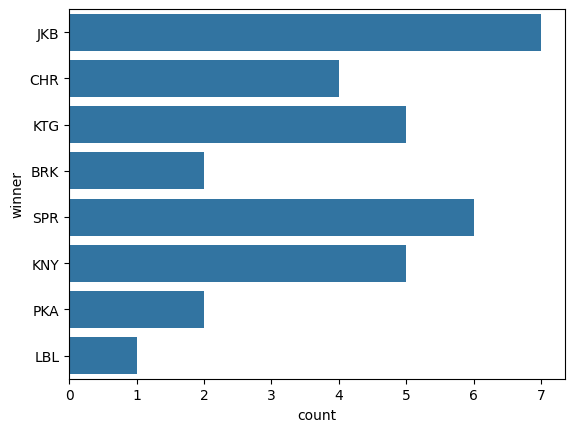

In [28]:
#winner of each match
team_runs = (
    df
    .groupby(['match_id','batting_team','bowling_team'])['runs_total']
    .sum()
    .reset_index()
)
team_runs
idx = team_runs.groupby('match_id')['runs_total'].idxmax()
winners = team_runs.loc[idx].reset_index(drop=True)
winners.columns = ['match_id','winner',"loser",'winner_runs']
winners
sns.countplot(winners["winner"])

In [29]:
#26. Calculate each bowler's strike rate (total balls bowled divided by wickets taken).
strike_rate = df.groupby("bowler").agg(
    total_balls=('ball', 'count'),
    total_wickets=('is_wicket', 'sum')
)
strike_rate["bowler_strike_rate"]=strike_rate.apply(
    lambda row: row['total_balls'] / row['total_wickets'] if row['total_wickets'] > 0 else None,
    axis=1
)
strike_rate.sort_values("total_wickets",ascending=False).head(20)


,total_balls,total_wickets,bowler_strike_rate
bowler,,,
sc kuggeleijn,191,19,10.052632
ln rajbanshi,244,17,14.352941
r dhakal,179,16,11.187500
k mahato,217,15,14.466667
sohail tanvir,192,15,12.800000
karan kc,150,14,10.714286
nk yadav,148,13,11.384615
sa zaib,146,13,11.230769
bp sharma,177,13,13.615385


In [30]:
#27. Compute the bowling average (total runs conceded divided by wickets taken) for each bowler.
bowling_avg = df.groupby("bowler").agg(
    total_runs=('runs_total', 'sum'),
    total_wickets=('is_wicket', 'sum')
)
bowling_avg["avg"]=bowling_avg.apply(
    lambda row: row['total_runs'] / row['total_wickets'] if row['total_wickets'] > 0 else None,
    axis=1
)
bowling_avg.sort_values("total_wickets",ascending=False).head(20)

,total_runs,total_wickets,avg
bowler,,,
sc kuggeleijn,210,19,11.052632
ln rajbanshi,222,17,13.058824
r dhakal,246,16,15.375000
k mahato,275,15,18.333333
sohail tanvir,180,15,12.000000
karan kc,162,14,11.571429
nk yadav,183,13,14.076923
sa zaib,152,13,11.692308
bp sharma,172,13,13.230769


<Axes: xlabel='economy_rate', ylabel='Count'>

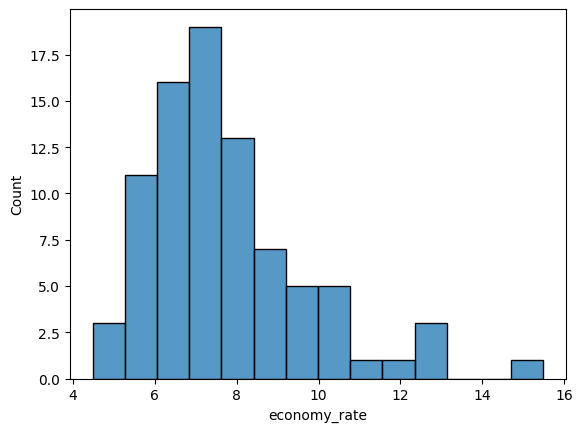

In [31]:
#28. Determine the economy rate for each bowler (runs conceded per over).
economy = df.groupby("bowler").agg(
    total_runs=('runs_total', 'sum'),
    total_balls=('ball', 'count')
)

economy['economy_rate'] = economy['total_runs'] / (economy['total_balls'] / 6)
economy.sort_values("economy_rate",inplace=True)
sns.histplot(economy["economy_rate"])

In [32]:
#29. Identify the top 5 bowlers with the best economy rates (minimum 5 overs).
economy["over_bowled"]=economy["total_balls"] // 6+(economy["total_balls"] % 6) / 10
filter_out_economy=economy[economy["over_bowled"]> 5.0]
filter_out_economy.head(20)

,total_runs,total_balls,economy_rate,over_bowled
bowler,,,,
harmeet singh,94,126,4.476190,21.0
mg erasmus,141,162,5.222222,27.0
zeeshan maqsood,180,203,5.320197,33.5
abhishesh gautam,87,97,5.381443,16.1
d kandel,87,96,5.437500,16.0
shahab alam,126,139,5.438849,23.1
ln rajbanshi,222,244,5.459016,40.4
sohail tanvir,180,192,5.625000,32.0
bp sharma,172,177,5.830508,29.3


<Axes: xlabel='Strike_Rate', ylabel='Count'>

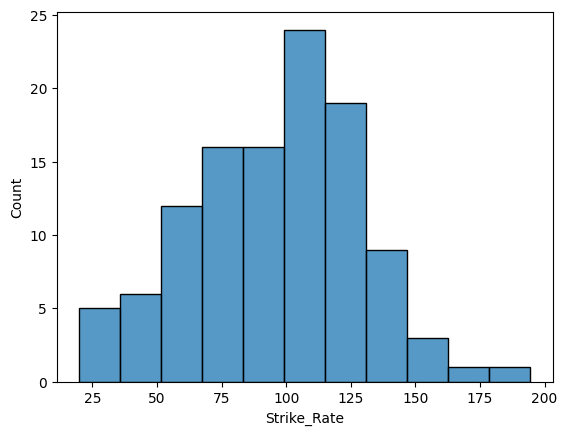

In [33]:
#30. Calculate the strike rate of each batsman (runs per 100 balls faced).
strike_rate_df = df.groupby('batter').agg(
    Runs=('runs_batter', 'sum'),
    Balls_Faced=('batter', 'count') 
).assign(
    Strike_Rate=lambda x: round((x['Runs'] / x['Balls_Faced']) * 100, 2)
).sort_values(by='Strike_Rate', ascending=False)
strike_rate_df=strike_rate_df[strike_rate_df["Strike_Rate"]>0]
sns.histplot(strike_rate_df["Strike_Rate"])

In [34]:
#31. Determine the batting average (total runs divided by number of dismissals) for each batsman.
batting_avg_df = df.groupby('batter').agg(
    runs=('runs_batter', 'sum'),
    total_dismissals=('is_wicket', 'sum') 
).assign(
    batting_avg=lambda x: round((x['runs'] / x['total_dismissals']),2)
).sort_values(by='batting_avg', ascending=False)
batting_avg_df.head(20)

,runs,total_dismissals,batting_avg
batter,,,
a bohara,2,0,inf
b khatri,4,0,inf
d gupta,5,0,inf
na sowter,1,0,inf
nar sarki,22,0,inf
k mahato,6,0,inf
s vesawkar,38,0,inf
subash bhandari,6,0,inf
tr bhandari,3,0,inf


In [35]:
batting_avg_df["balls_faced"]=df.groupby("batter")["batter"].count()
batting_avg_df[batting_avg_df["balls_faced"]>30]

,runs,total_dismissals,batting_avg,balls_faced
batter,,,,
s vesawkar,38,0,inf,48
rk paudel,279,6,46.50,218
s dhawan,136,3,45.33,118
ags gous,225,5,45.00,138
rs bopara,286,7,40.86,215
...,...,...,...,...
mohammad mohsin,42,5,8.40,41
ma leask,44,6,7.33,36
karan kc,51,7,7.29,40


In [36]:
#33. Analyze bowler vs batsman matchups: compute total runs, balls faced, and dismissals.
bowler_vs_batter = df.groupby(['batter', 'bowler']).agg(
    total_runs=('runs_batter', 'sum'),
    balls_faced=('batter', 'count'),
    dismissals=('is_wicket', 'sum')
).assign(
    strike_rate=lambda row : round (row["total_runs"]/row["balls_faced"]*100,2) 
).reset_index()

bowler_vs_batter[bowler_vs_batter["balls_faced"]>=6].sort_values(["strike_rate","total_runs","balls_faced"],ascending=False).head(30)


,batter,bowler,total_runs,balls_faced,dismissals,strike_rate
732,jds neesham,basil hameed,37,10,0,370.00
130,ags gous,bj mcmullen,21,6,0,350.00
1456,sompal kami,jds neesham,21,6,1,350.00
133,ags gous,d adhikari,20,6,0,333.33
742,jds neesham,mjj critchley,20,6,0,333.33
515,d kharel,d gupta,19,6,0,316.67
751,jds neesham,wg bosisto,22,7,0,314.29
525,d kharel,rashid khan,18,6,1,300.00
734,jds neesham,d kandel,17,6,0,283.33
806,kushal malla,a yadav,17,6,0,283.33


In [37]:
#34. Identify bowler-batsman pairs where batsman's strike rate exceeds 150.
bowler_vs_batter[bowler_vs_batter["strike_rate"]>150]

,batter,bowler,total_runs,balls_faced,dismissals,strike_rate
5,a gharti,h thaker,24,10,0,240.00
10,a gharti,mg erasmus,4,1,0,400.00
27,a ghiraiya,nk yadav,5,3,0,166.67
28,a ghiraiya,pratis gc,6,2,0,300.00
38,a kharel,sc kuggeleijn,6,3,0,200.00
...,...,...,...,...,...,...
1563,wg bosisto,s vesawkar,12,6,0,200.00
1565,wg bosisto,saad bin zafar,15,8,0,187.50
1567,wg bosisto,tr bhandari,10,6,0,166.67
1582,zeeshan maqsood,h thaker,5,3,0,166.67


In [38]:
#35. Compare runs scored by right-handed vs. left-handed batsmen across all matches.
df.groupby(["batting_side"]).agg(
        total_runs=('runs_batter','sum'),
        balls_faced=("ball","count")
). assign(
    strike_rate=lambda row : round (row["total_runs"]/row["balls_faced"]*100,2) 
)

,total_runs,balls_faced,strike_rate
batting_side,,,
l,821,808,101.61
r,7338,6690,109.69


In [39]:
#36. Analyze average runs conceded by pace bowlers vs. spin bowlers.
bowling_avg = df.groupby(["bowling_category"]).agg(
    total_runs=('runs_total', 'sum'),
    total_wickets=('is_wicket', 'sum')
)
bowling_avg["avg"]=bowling_avg.apply(
    lambda row: row['total_runs'] / row['total_wickets'] if row['total_wickets'] > 0 else None,
    axis=1
)
bowling_avg

,total_runs,total_wickets,avg
bowling_category,,,
Pace,4125,216,19.097222
Spin,4439,227,19.555066


In [40]:
#37. Compare right-handed batsmen's performance against pace and spin.
right_handed_batsman = df[df["batting_side"] == "r"]
legal_balls = right_handed_batsman[right_handed_batsman["runs_extras"] == 0]
right_handed_batsman.groupby("bowling_category").agg(
    total_runs=("runs_batter", "sum"),
    total_dismissals=("is_wicket", "sum")
).join(
    legal_balls.groupby("bowling_category")["batter"].count().rename("balls_faced")
).assign(
    strike_rate=lambda x: round(x["total_runs"] / x["balls_faced"] * 100, 2),
    batting_avg=lambda x: np.round(
        np.where(x["total_dismissals"] == 0, 0, x["total_runs"] / x["total_dismissals"]), 2
    )
)


,total_runs,total_dismissals,balls_faced,strike_rate,batting_avg
bowling_category,,,,,
Pace,3407,199,2732,124.71,17.12
Spin,3774,208,3440,109.71,18.14


In [41]:
#38. Determine which batting side (R/L) scores better against off-spinners.
right_arm_offbreak_df=df[df["bowling_type"]=="right arm offbreak"]
legal_balls = right_arm_offbreak_df[right_arm_offbreak_df["runs_extras"] == 0]
right_arm_offbreak_df.groupby("batting_side").agg(
    total_runs=("runs_batter", "sum"),
    total_dismissals=("is_wicket", "sum")
).join(
    legal_balls.groupby("batting_side")["batter"].count().rename("balls_faced")
).assign(
    strike_rate=lambda x: round(x["total_runs"] / x["balls_faced"] * 100, 2),
    batting_avg=lambda x: np.round(
        np.where(x["total_dismissals"] == 0, np.nan, x["total_runs"] / x["total_dismissals"]), 2
    )
).fillna(0)

,total_runs,total_dismissals,balls_faced,strike_rate,batting_avg
batting_side,,,,,
l,122,4,162,75.31,30.5
r,1086,60,936,116.03,18.1


In [42]:

#39. Identify bowlers with better strike rates in death overs (17-20) vs powerplay (1-6).
death_over = df[df["over"].between(16, 19)]
powerplay_over = df[df["over"].between(0, 5)]

death_stats = death_over.groupby("bowler").agg(
    death_wickets=('is_wicket', 'sum'),
    death_balls=('ball', 'count'),
    total_runs=("runs_total","sum")
).assign(
    death_sr=lambda x: x['death_balls'] / x['death_wickets'],
    death_eco=lambda x:  x['total_runs']/(x["death_balls"]/6)
)

pp_stats = powerplay_over.groupby("bowler").agg(
    pp_wickets=('is_wicket', 'sum'),
    pp_balls=('ball', 'count'),
    total_runs=("runs_total","sum")
).assign(
    pp_sr=lambda x: x['pp_balls'] / x['pp_wickets'],
    pp_eco=lambda x:  x['total_runs']/(x["pp_balls"]/6)
)

merged = death_stats.merge(pp_stats, on="bowler")
better_in_death = merged[merged["death_sr"] < merged["pp_sr"]]
better_in_death = better_in_death.sort_values("death_sr")


better_in_death

better_in_death[better_in_death['death_balls'] >= 30]

death_stats=death_stats.sort_values("death_eco")
death_stats[death_stats["death_balls"]>=30]
# pp_stats=pp_stats.sort_values("pp_eco")
# pp_stats[pp_stats["pp_balls"]>=30]

,death_wickets,death_balls,total_runs,death_sr,death_eco
bowler,,,,,
saad bin zafar,4,31,24,7.750000,4.645161
sohail tanvir,4,39,41,9.750000,6.307692
ln rajbanshi,4,36,38,9.000000,6.333333
s lamichhane,3,30,35,10.000000,7.000000
sc kuggeleijn,7,52,63,7.428571,7.269231
karan kc,9,50,66,5.555556,7.920000
k mahato,11,65,94,5.909091,8.676923
ra reifer,5,44,65,8.800000,8.863636
sompal kami,5,58,86,11.600000,8.896552


In [49]:
#40. Generate per-match bowling figures for each bowler (overs-runs-wickets format).
df_legal_bowl=df[df["runs_extras"] == 0]
df_bowling_fig=df_legal_bowl.groupby(["match_id","bowler"]).agg(
    wickets=("is_wicket","sum"),
    runs=("runs_total","sum"),
    total_ball=("ball","count")
).assign(
    overs = lambda row : row['total_ball'] // 6 + 0.1 * (row['total_ball'] % 6)
)
df_bowling_fig["bowling_fig"] = df_bowling_fig.apply(
    lambda row: f"{row["overs"]}-{row["runs"]}-{row["wickets"]}", axis=1
)
df_bowling_fig


wickets  runs  total_ball  overs   bowling_fig
match_id bowler                                                         
1462596  a kharel               0    11           6    1.0  1.0-11.0-0.0
         aqib ilyas             0    19          18    3.0  3.0-19.0-0.0
         bwm mike               1    20          16    2.4  2.4-20.0-1.0
         cb sole                1    21          17    2.5  2.5-21.0-1.0
         h thaker               3    22          24    4.0  4.0-22.0-3.0
...                           ...   ...         ...    ...           ...
1462670  mohammad mohsin        3    40          23    3.5  3.5-40.0-3.0
         n saud                 0     3           2    0.2   0.2-3.0-0.0
         s malla                0    25          12    2.0  2.0-25.0-0.0
         sa zaib                2    14          17    2.5  2.5-14.0-2.0
         sc kuggeleijn          1    29          18    3.0  3.0-29.0-1.0

[403 rows x 5 columns]

In [47]:
#41. List batsmen who hit at least one boundary in more than 50% of innings.
total_inning_played=df.groupby("batter").agg(
    total_innings=("inning","nunique")
)
boudry_filter=df[df["runs_batter"].isin([4,6])]
boundry_inning_played=boudry_filter.groupby("batter").agg(
    boundry_innings=("inning","nunique")
)


result = total_inning_played.join(boundry_inning_played, how="left").fillna(0)
result["boundary_ratio"] = result["boundry_innings"] / result["total_innings"]
result.sort_values("boundary_ratio",ascending=False)

,total_innings,boundry_innings,boundary_ratio
batter,,,
a kharel,2,2.0,1.0
a ghiraiya,2,2.0,1.0
a saud,2,2.0,1.0
b sharki,2,2.0,1.0
aarif sheikh,2,2.0,1.0
...,...,...,...
rohan mustafa,1,0.0,0.0
subash bhandari,1,0.0,0.0
tr bhandari,1,0.0,0.0


In [61]:
#42. Compute the dot ball percentage for each bowler.
df_legal_bowl=df[df["runs_extras"] == 0]
df_dot_balls=df_legal_bowl.groupby("bowler").agg(
    total_balls=("ball","count"),
    dot_balls=("runs_batter", lambda x: (x == 0).sum())
).assign(
    dot_balls_percent=lambda x: x["dot_balls"]/x["total_balls"]*100
)
df_dot_balls=df_dot_balls[df_dot_balls["total_balls"]>=100]
df_dot_balls.sort_values("dot_balls_percent",ascending=False).head(20)

,total_balls,dot_balls,dot_balls_percent
bowler,,,
harmeet singh,119,69,57.983193
ln rajbanshi,235,135,57.446809
bipin khatri,107,59,55.140187
sc kuggeleijn,173,95,54.913295
shahab alam,137,74,54.014599
mg erasmus,147,79,53.741497
sohail tanvir,177,95,53.672316
basir ahamad,111,58,52.252252
bj mcmullen,113,59,52.212389


In [ ]:
#43. Find players who were dismissed most often in the final 5 overs.